In [ ]:
!pip install plotly
!pip install pandas

In [ ]:
#Task 1:
#1:import essential and neccesary libraries
import pandas as pd
import datetime
from datetime import date,timedelta
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#2:display all the columns of dataframes
data = pd.read_excel("/content/HousePrediction.xlsx")
df=pd.DataFrame(data)
print(df)

        Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0        0          60       RL     8450    Inside     1Fam            5   
1        1          20       RL     9600       FR2     1Fam            8   
2        2          60       RL    11250    Inside     1Fam            5   
3        3          70       RL     9550    Corner     1Fam            5   
4        4          60       RL    14260       FR2     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160       RM     1894    Inside   TwnhsE            5   
2916  2916          20       RL    20000    Inside     1Fam            7   
2917  2917          85       RL    10441    Inside     1Fam            5   
2918  2918          60       RL     9627    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0      

In [ ]:
#3:	Read the data and display the first 100 rows from the data
print(data.head(100))

    Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0    0          60       RL     8450    Inside     1Fam            5   
1    1          20       RL     9600       FR2     1Fam            8   
2    2          60       RL    11250    Inside     1Fam            5   
3    3          70       RL     9550    Corner     1Fam            5   
4    4          60       RL    14260       FR2     1Fam            5   
..  ..         ...      ...      ...       ...      ...          ...   
95  95          60       RL     9765    Corner     1Fam            8   
96  96          20       RL    10264    Inside     1Fam            5   
97  97          20       RL    10921    Inside     1Fam            5   
98  98          30       RL    10625    Corner     1Fam            5   
99  99          20       RL     9320    Inside     1Fam            5   

    YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0        2003          2003     VinylSd         0.0      

In [ ]:
#4:	Give the column insights
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
None


In [ ]:
#Task 2:
#1:checking for missing values
print(data.isnull())

         Id  MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  \
0     False       False     False    False      False     False        False   
1     False       False     False    False      False     False        False   
2     False       False     False    False      False     False        False   
3     False       False     False    False      False     False        False   
4     False       False     False    False      False     False        False   
...     ...         ...       ...      ...        ...       ...          ...   
2914  False       False     False    False      False     False        False   
2915  False       False     False    False      False     False        False   
2916  False       False     False    False      False     False        False   
2917  False       False     False    False      False     False        False   
2918  False       False     False    False      False     False        False   

      YearBuilt  YearRemodAdd  Exterior

In [ ]:
#2:Features with NAN values
print(data.isnull().sum())


Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


In [ ]:
# 3: Calculate  with  mean  sales Price where the information is present or Missing

data ['SalePrice'].fillna(data['SalePrice'].mean(),inplace=True)
print(data.isnull().sum())


Id              0
MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64


In [ ]:
#4:give count of numeric features
data.select_dtypes(include=['number']).shape[1]

9

In [ ]:
# 5: Prints the first five rows of numerical values

print(data.select_dtypes(include=['number']).head(5))

   Id  MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0   0          60     8450            5       2003          2003         0.0   
1   1          20     9600            8       1976          1976         0.0   
2   2          60    11250            5       2001          2002         0.0   
3   3          70     9550            5       1915          1970         0.0   
4   4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  SalePrice  
0        856.0   208500.0  
1       1262.0   181500.0  
2        920.0   223500.0  
3        756.0   140000.0  
4       1145.0   250000.0  


In [ ]:
# 6: We will Compare the difference between all the years features with SalesPrice
print(data.groupby('YearBuilt').mean()['SalePrice'])

YearBuilt
1872    122000.000000
1875     94000.000000
1879    180921.195890
1880    196680.039178
1882    168000.000000
            ...      
2006    215321.448610
2007    214385.740857
2008    259744.512105
2009    244496.334849
2010    252091.463927
Name: SalePrice, Length: 118, dtype: float64


<ipython-input-21-7e6a4df31ce9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('YearBuilt').mean()['SalePrice'])


-0.05503604000024567


Text(0.5, 1.0, 'relationship between overall condition and saleprice')

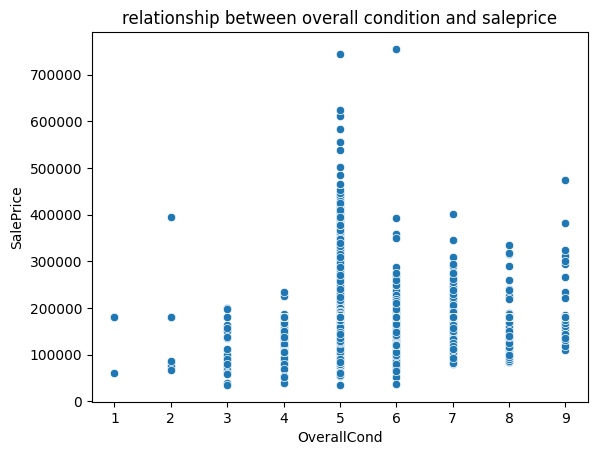

In [ ]:
#7:On the Discrete Variable  Find the relationship between Discrete and Sales price

print(data['OverallCond'].corr(data['SalePrice']))
sns.scatterplot(data=data,x='OverallCond',y='SalePrice',legend='auto').set_title('relationship between overall condition and saleprice')


-0.05503604000024567


Text(0.5, 1.0, 'relationship between overall condition and saleprice')

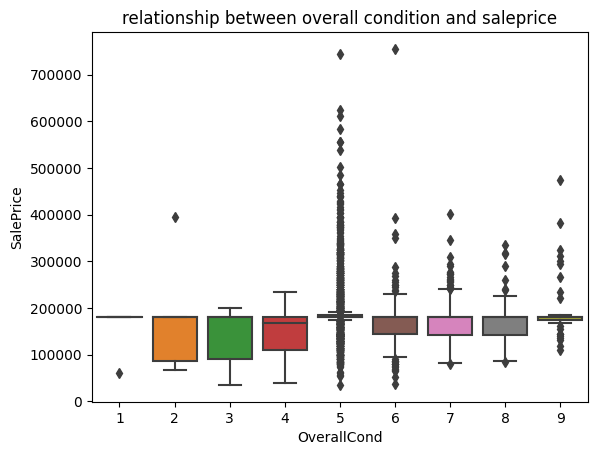

In [ ]:
print(data['OverallCond'].corr(data['SalePrice']))
sns.boxplot(data=data,x='OverallCond',y='SalePrice').set_title('relationship between overall condition and saleprice')

0.43191230945275105


Text(0.5, 1.0, 'relationship between Total basement square feet and saleprice')

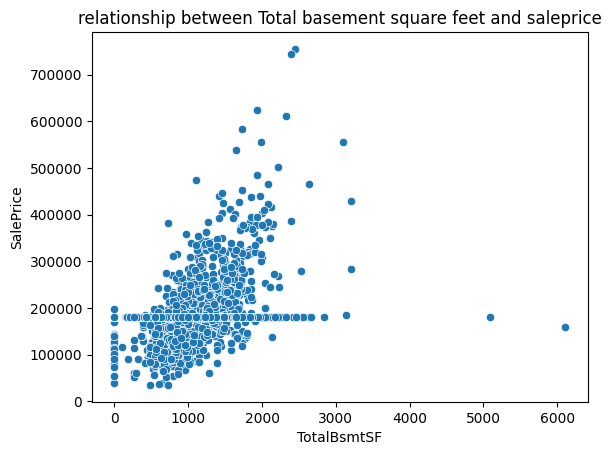

In [ ]:
#8:On the Continous Variable  Find the relationship between Discrete and Sales Price
print(data['TotalBsmtSF'].corr(data['SalePrice']))
sns.scatterplot(data=data,x='TotalBsmtSF',y='SalePrice',legend='auto').set_title('relationship between Total basement square feet and saleprice')



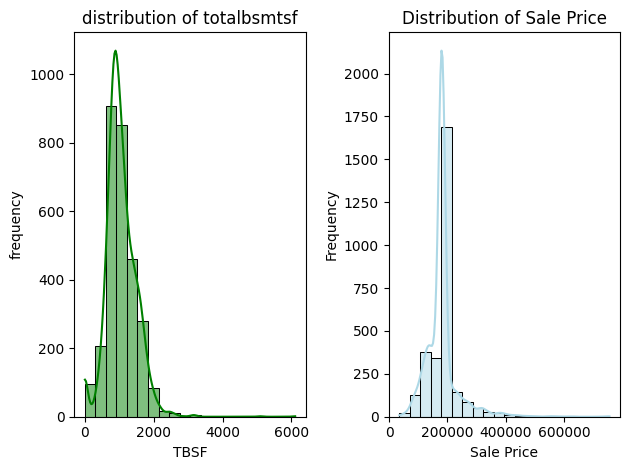

In [ ]:
#9:Analyse the Continous values by creating the histogram to understand the distribution.
plt.subplot(1,2,1)
sns.histplot(data['TotalBsmtSF'],bins=20,kde=True,color='green')
plt.title('distribution of totalbsmtsf')
plt.xlabel('TBSF')
plt.ylabel('frequency')

plt.subplot(1,2,2)
sns.histplot(data=df, x='SalePrice', bins=20, kde=True, color='lightblue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
#10:Apply the Lograthmic Transformation
np.log(data['SalePrice'])
np.log(data['TotalBsmtSF'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       6.752270
1       7.140453
2       6.824374
3       6.628041
4       7.043160
          ...   
2914    6.302619
2915    6.302619
2916    7.109879
2917    6.815640
2918    6.903747
Name: TotalBsmtSF, Length: 2919, dtype: float64

In [ ]:
from scipy.stats import zscore
scr = zscore(df['SalePrice'])
outliers = np.abs(scr)>3
res = df['SalePrice'][outliers]

print("Total Outliers=",len(res))
res

Total Outliers= 56


53      385000.0
58      438780.0
112     383970.0
151     372402.0
161     412500.0
178     501837.0
185     475000.0
224     386250.0
231     403000.0
278     415298.0
309     360000.0
313     375000.0
321     354000.0
336     377426.0
349     437154.0
378     394432.0
389     426000.0
440     555000.0
473     440000.0
477     380000.0
481     374000.0
496     430000.0
515     402861.0
527     446261.0
585     369900.0
591     451950.0
608     359100.0
644     370878.0
654     350000.0
661     402000.0
664     423000.0
678     372500.0
688     392000.0
691     755000.0
702     361919.0
769     538000.0
774     395000.0
798     485000.0
803     582933.0
825     385000.0
877     350000.0
898     611657.0
987     395192.0
1046    556581.0
1142    424870.0
1169    625000.0
1181    392500.0
1182    745000.0
1228    367294.0
1243    465000.0
1267    378500.0
1268    381000.0
1353    410000.0
1373    466500.0
1388    377500.0
1437    394617.0
Name: SalePrice, dtype: float64

In [ ]:
#find relationship between catagorial feature and sale price

cat_agory = data.select_dtypes(include = ['object','category']).columns
print(cat_agory)

colum = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

for col in colum:
  fig=px.box(df,x=col,y='SalePrice',title = f'relationship between {col} and SalePrice')
  fig.show()


Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')


In [ ]:
# correlation between numerical features and SalePrice

df[['SalePrice','LotArea','MSSubClass','TotalBsmtSF']].corr(method='pearson')

,SalePrice,LotArea,MSSubClass,TotalBsmtSF
SalePrice,1.000000,0.236105,-0.059294,0.431912
LotArea,0.236105,1.000000,-0.201730,0.254138
MSSubClass,-0.059294,-0.201730,1.000000,-0.219965
TotalBsmtSF,0.431912,0.254138,-0.219965,1.000000


In [ ]:
Li_st = ['LotArea','MSSubClass','TotalBsmtSF']

plot=px.scatter(
    data_frame= data,
    x='SalePrice',
    y=Li_st)
plot


In [ ]:
#Find Continous  Features vs  Sales Price
continuous_features = df.select_dtypes(include=['int64', 'float64'])
continuous_features['SalePrice'] = df['SalePrice']


correlation_matrix = continuous_features.corr()

print("Correlation Matrix:")
print(correlation_matrix)

print("\nCorrelation with SalePrice:")
print(correlation_matrix['SalePrice'].sort_values(ascending=False))

Correlation Matrix:
                    Id  MSSubClass   LotArea  OverallCond  YearBuilt  \
Id            1.000000    0.008931 -0.040746    -0.002839  -0.016581   
MSSubClass    0.008931    1.000000 -0.201730    -0.065625   0.034409   
LotArea      -0.040746   -0.201730  1.000000    -0.035617   0.024128   
OverallCond  -0.002839   -0.065625 -0.035617     1.000000  -0.368477   
YearBuilt    -0.016581    0.034409  0.024128    -0.368477   1.000000   
YearRemodAdd -0.050438    0.043315  0.021612     0.047654   0.612235   
BsmtFinSF2    0.018251   -0.072530  0.084059     0.041501  -0.027595   
TotalBsmtSF  -0.024924   -0.219965  0.254138    -0.174002   0.408515   
SalePrice    -0.007753   -0.059294  0.236105    -0.055036   0.368664   

              YearRemodAdd  BsmtFinSF2  TotalBsmtSF  SalePrice  
Id               -0.050438    0.018251    -0.024924  -0.007753  
MSSubClass        0.043315   -0.072530    -0.219965  -0.059294  
LotArea           0.021612    0.084059     0.254138   0.236105  